# MARKETING CAMPAIGN

Importing required Packages

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Reading the data set using pandas

In [82]:
data= pd.read_csv(r'mkt_cmp.csv')
data.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

Viewing top 5 rows of data

In [83]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# DATA PREPROCESSING

Checking for duplicate data in the dataset

In [84]:
data.duplicated().sum()

0

Checking for null values in the data

In [85]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

we see only income column have 24 null values. All the null values in the income column are filled with medians of income of respective education categories.

In [86]:
import numpy as np

unique_Education = pd.unique(data.Education)
temp_data = data.copy()  
columns = ['Income'] 
for c in unique_Education:
    Education_filtre = temp_data.Education == c
    filtered_data = temp_data[Education_filtre]
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): 
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else:
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")          
    temp_data[Education_filtre] = filtered_data
data = temp_data.copy() 

Missing Value in Income column fill with 52720.37 when Education:Graduation
Missing Value in Income column fill with 56145.31 when Education:PhD
Missing Value in Income column fill with 52917.53 when Education:Master
Missing Value in Income column fill with 20306.26 when Education:Basic
Missing Value in Income column fill with 47633.19 when Education:2n Cycle


C:\Users\prava\AppData\Local\Temp\ipykernel_35020\1829762535.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

'Year_Birth' column is converted to 'Age' and then we dropped Year_Birth column.

In [88]:
data['Age'] = 2022 - data['Year_Birth']
data=data.drop("Year_Birth",axis=1)

In [89]:
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,65
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,68
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,57
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,38
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,55
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,3,11,0,76
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,41
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,66


In [90]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [91]:
data['Z_Revenue'].value_counts()
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,65
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,68
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,57
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,38
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,55
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,3,11,0,76
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,41
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,66


Z_CostContact and Z_Revenue columns have Constant values through out the observations so we will drop this redundant columns 

In [92]:
data=data.drop(["Z_CostContact","Z_Revenue"],axis=1)

In [93]:
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,65
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,68
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,57
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,38
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,4,5,0,0,0,0,0,0,0,55
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,5,7,0,0,0,1,0,0,0,76
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,41
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,66


"ID" column is unique for each customer , so this column is not useful for training the model. So, we will drop 'ID' column

In [94]:
data=data.drop("ID",axis=1)

Marital Status

In [95]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<AxesSubplot: xlabel='Marital_Status', ylabel='count'>

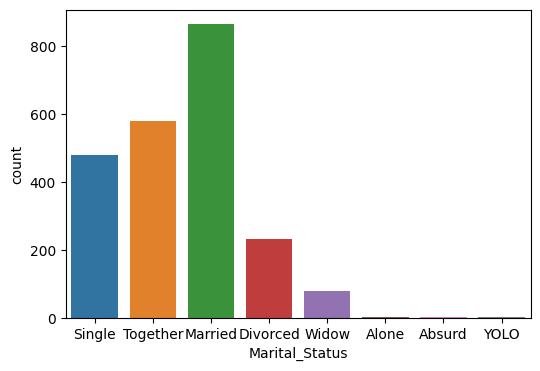

In [96]:
count_ms = data['Marital_Status'].value_counts()
count_ms / len(data.Marital_Status) * 100
plt.figure(figsize=(6,4))
sns.countplot(data=data, x=data['Marital_Status'])

Marital Status have 8 differnt categories. Among which we combined Yolo,Absurd, Alone, Single,Divorced,Widow categories and made it into single column with category "Single" and then we combined Together and Married categories and named it as Together category.

In [97]:
data["Marital_Status"].replace(["YOLO","Absurd","Alone","Single","Divorced","Widow"], "Single", inplace = True)
data["Marital_Status"].replace(["Together","Married"],"Together",inplace = True)

In [98]:
data['Marital_Status'].value_counts()

Together    1444
Single       796
Name: Marital_Status, dtype: int64

Then for the created 2 categories we created dummy columns for each category in data

In [99]:
data_dummies=pd.get_dummies(data['Marital_Status'])

In [100]:
data=pd.concat([data,data_dummies],axis=1)

After creating dummies we dropped Marital Status and Together columns from the data

In [101]:
data=data.drop(["Marital_Status","Together"],axis=1)

In [102]:
count_ed = data['Education'].value_counts()
(count_ed / len(data.Education)) * 100

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64

<AxesSubplot: xlabel='Education', ylabel='count'>

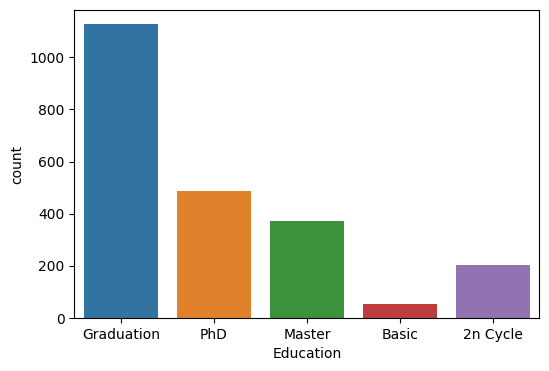

In [103]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x=data['Education'])

For 5 categories of Education column , we created dummy columns for each category and dropped Education and PhD columns.

In [104]:
edu_dummies=pd.get_dummies(data['Education'])

In [105]:
data=pd.concat([data,edu_dummies],axis=1)

In [106]:
data=data.drop(["Education","PhD"],axis=1)

In [107]:
data

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Single,2n Cycle,Basic,Graduation,Master
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,0,0,0,1,65,1,0,0,1,0
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,0,0,0,0,68,1,0,0,1,0
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,0,0,0,0,57,0,0,0,1,0
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,0,0,0,0,38,0,0,0,1,0
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,0,0,0,0,41,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,2013-06-13,46,709,43,182,42,118,...,0,0,0,0,55,0,0,0,1,0
2236,64014.0,2,1,2014-06-10,56,406,0,30,0,0,...,1,0,0,0,76,0,0,0,0,0
2237,56981.0,0,0,2014-01-25,91,908,48,217,32,12,...,0,0,0,0,41,1,0,0,1,0
2238,69245.0,0,1,2014-01-24,8,428,30,214,80,30,...,0,0,0,0,66,0,0,0,0,1


Combined Kidhome and Teenhome columns and created a new column named Total_minors and then dropped Kidhome & Teenhome

In [108]:
data['Total_minors'] = data.loc[data['Kidhome'] >= 0,['Kidhome','Teenhome']].sum(axis=1)

In [109]:
data=data.drop(['Kidhome','Teenhome'],axis=1)

we breaked Dt_customer column to 3 different columns to calculate the customer experience till date and then dropped Dt_customer column along with 3 new columns finally giving rise to a new column named "Cust_exp"

In [110]:
from datetime import datetime
t = datetime.today().strftime('%Y-%m-%d')
today=datetime.strptime(t,'%Y-%m-%d')
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])
#data['customer_experience']=abs((today -data['Dt_Customer'] ))

data['Year_Customer'] = data['Dt_Customer'].apply(lambda x: x.year)
data['Month_Customer'] = data['Dt_Customer'].apply(lambda x: x.month)
data['Day_Customer'] = data['Dt_Customer'].apply(lambda x: x.day)

In [111]:
data=data.drop('Dt_Customer',axis=1)

In [112]:
data.count()

Income                 2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Response               2240
Age                    2240
Single                 2240
2n Cycle               2240
Basic                  2240
Graduation             2240
Master                 2240
Total_minors           2240
Year_Customer          2240
Month_Customer         2240
Day_Customer           2240
dtype: int64

In [113]:
data['cust_exp']=((2022-data['Year_Customer'])*365)+((data['Month_Customer']-1)*30)+(data['Day_Customer'])

In [114]:
data=data.drop(['Year_Customer','Month_Customer','Day_Customer'],axis=1)

# OUTLIERS

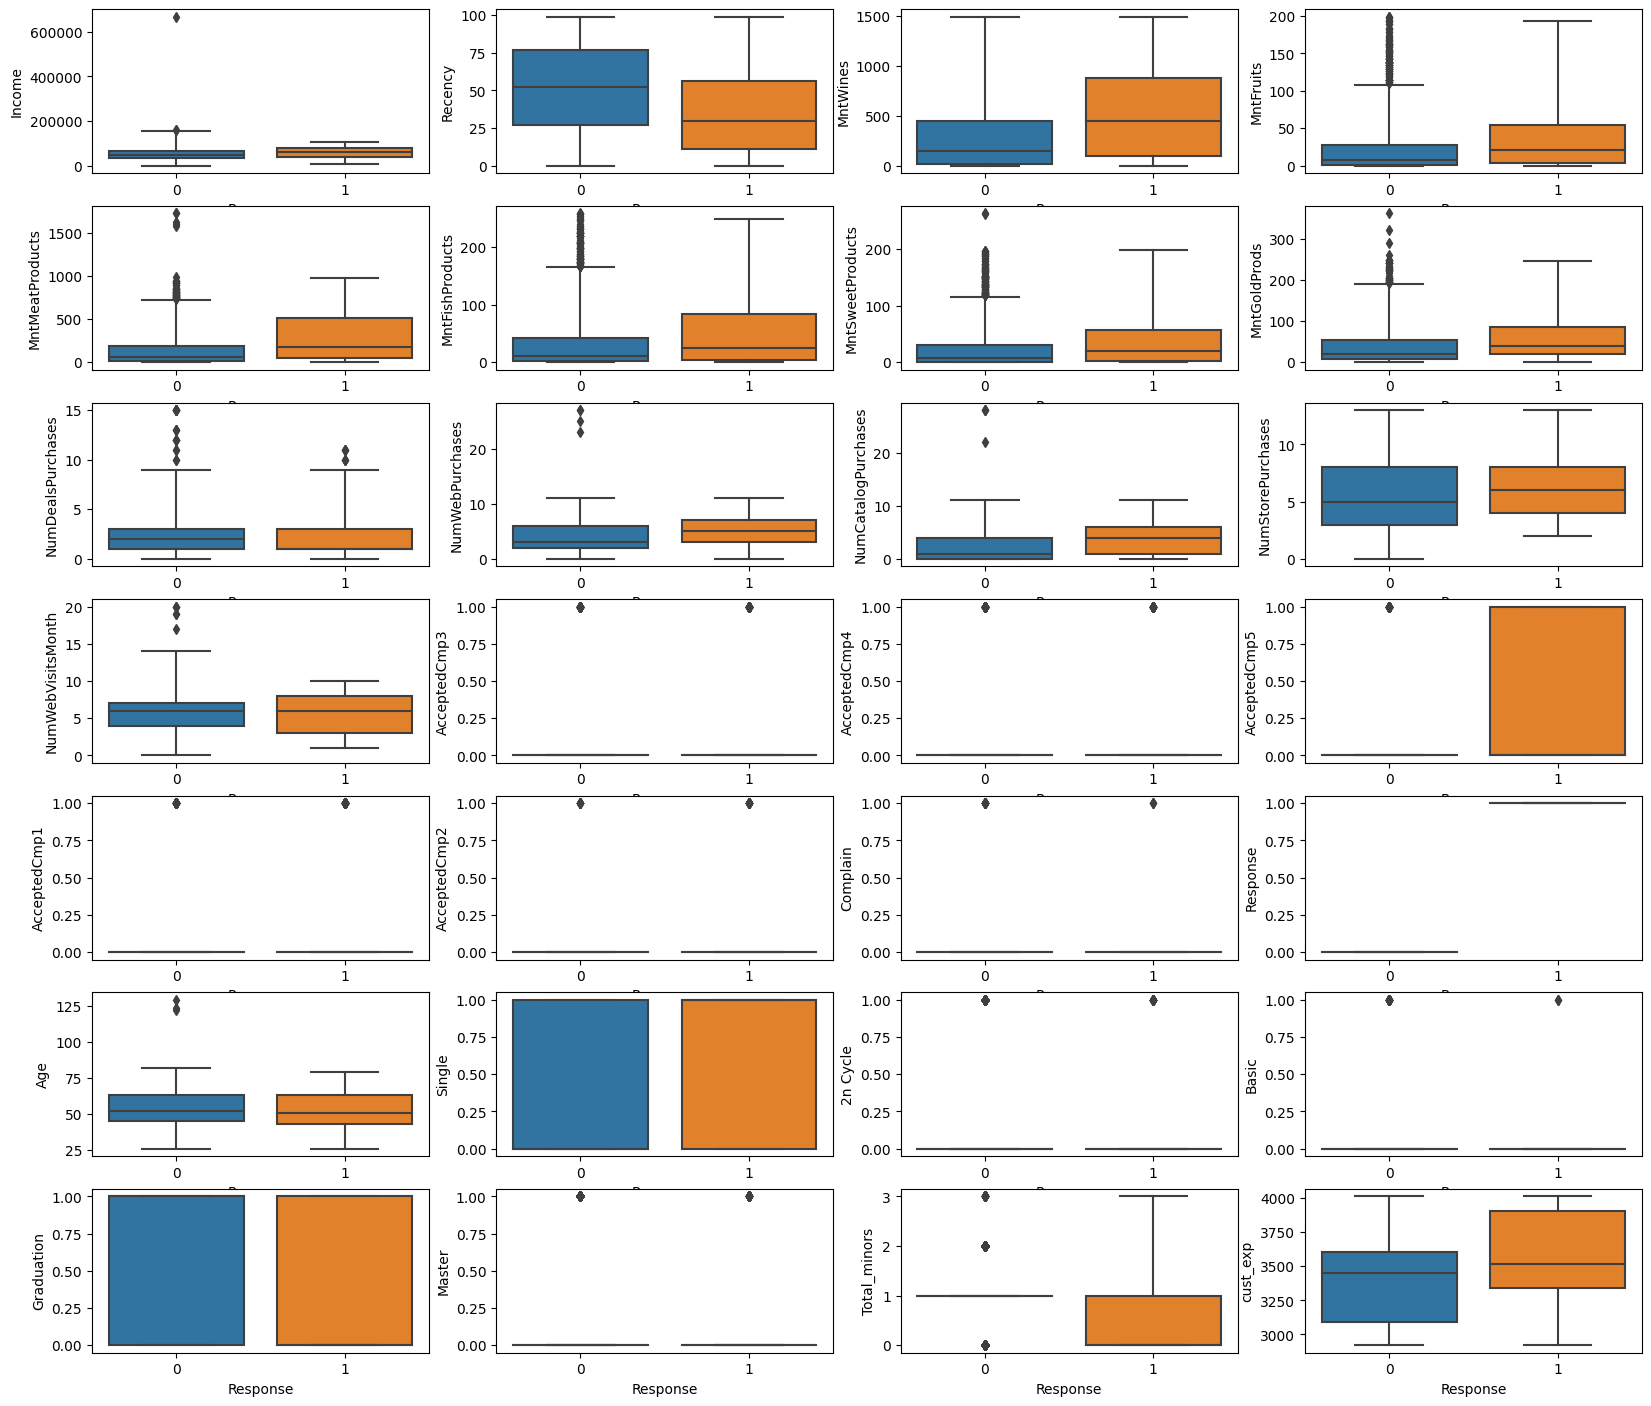

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
label = data['Response']
def boxplot_all(data, label):
    index = 0
    plt.figure(figsize=(20,20))
    for feature in data.columns:
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(y = feature, x = label, data = data, whis=3)

boxplot_all(data, label)

we see potential ouliers in 2 colums i.e Age & Income. Taking 100 as cut off we deleted all the observations with customer age >100 and took 200k as cut off for income and one observation have income more than 200k, so we drooped that observation.

In [116]:
Q = data['Age'] < 100
data[Q].head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Single,2n Cycle,Basic,Graduation,Master,Total_minors,cust_exp
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1,65,1,0,0,1,0,0,3894
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,68,1,0,0,1,0,2,2988
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,57,0,0,0,1,0,0,3516
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,38,0,0,0,1,0,1,2960
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,41,0,0,0,0,0,1,2939


In [117]:
data = data[data.Age < 100]

In [118]:
data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Single,2n Cycle,Basic,Graduation,Master,Total_minors,cust_exp
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1,65,1,0,0,1,0,0,3894
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,68,1,0,0,1,0,2,2988
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,57,0,0,0,1,0,0,3516
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,38,0,0,0,1,0,1,2960
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,41,0,0,0,0,0,1,2939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,55,0,0,0,1,0,1,3448
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,76,0,0,0,0,0,3,3080
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,41,1,0,0,1,0,0,2945
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,66,0,0,0,0,1,1,2944


In [119]:
data = data[data.Income < 200000]

In [120]:
data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Single,2n Cycle,Basic,Graduation,Master,Total_minors,cust_exp
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1,65,1,0,0,1,0,0,3894
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,68,1,0,0,1,0,2,2988
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,57,0,0,0,1,0,0,3516
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,38,0,0,0,1,0,1,2960
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,41,0,0,0,0,0,1,2939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,55,0,0,0,1,0,1,3448
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,76,0,0,0,0,0,3,3080
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,41,1,0,0,1,0,0,2945
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,66,0,0,0,0,1,1,2944


# Data Visualization

In [121]:
df=data

In [122]:
df['spending'] = df.MntFishProducts+df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines 

C:\Users\prava\AppData\Local\Temp\ipykernel_35020\680445564.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



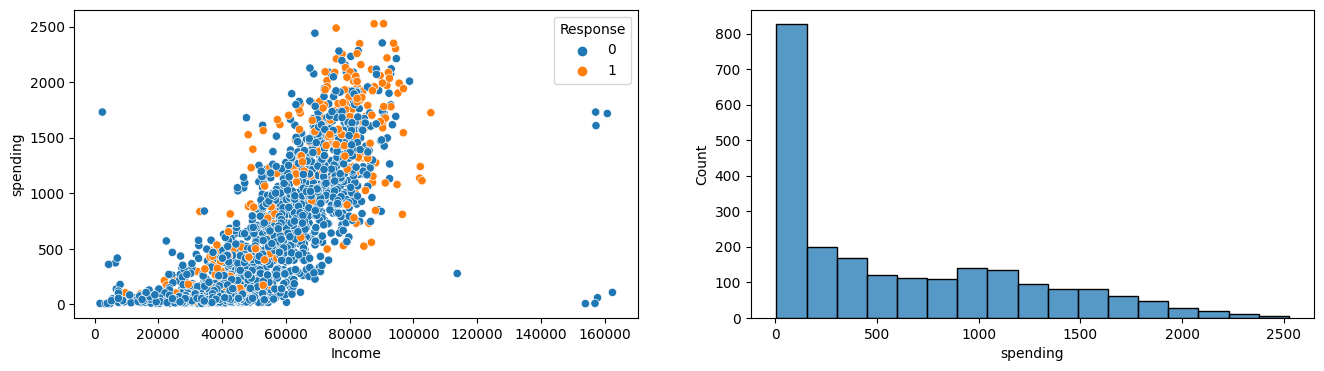

In [123]:
fig,ax = plt.subplots(1,2,figsize=(16,4))
sns.scatterplot(x='Income',y='spending',data=df,hue='Response',ax=ax[0])
sns.histplot(df.spending,ax=ax[1])
plt.show()

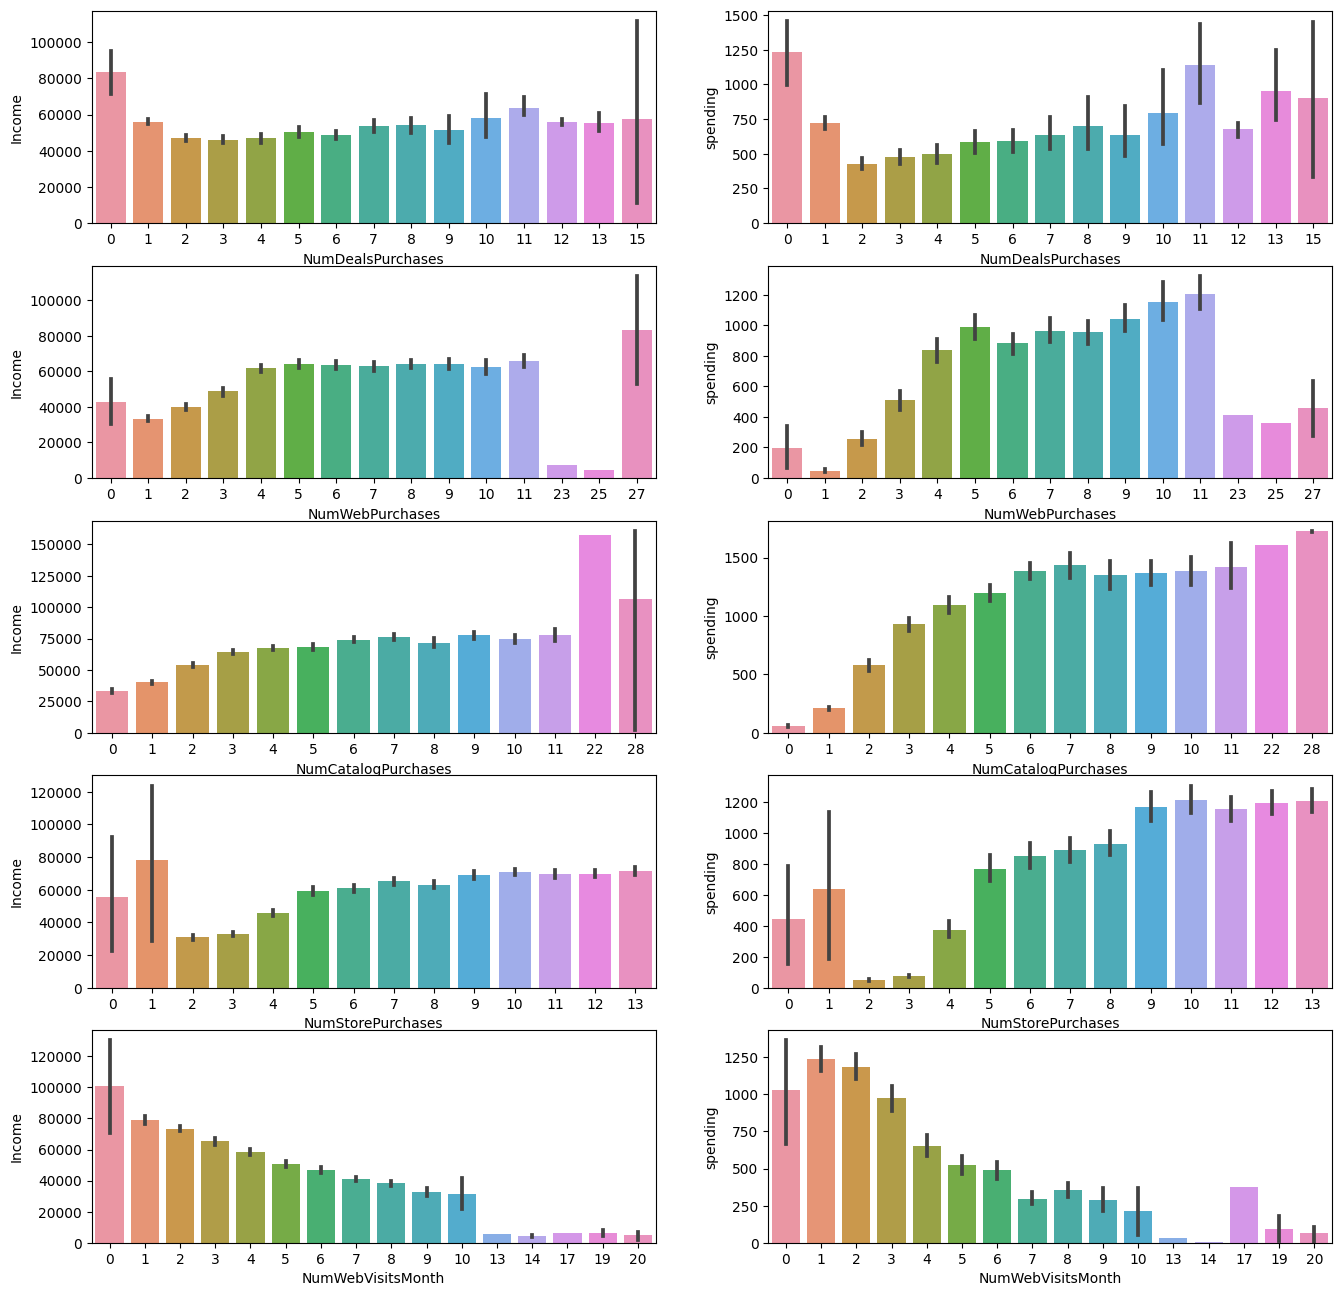

In [124]:
fig,ax = plt.subplots(5,2,figsize=(16,16))
sns.barplot(x='NumDealsPurchases',y='Income',data=data,ax=ax[0,0])
sns.barplot(x='NumDealsPurchases',y='spending',data=data,ax=ax[0,1])
sns.barplot(x='NumWebPurchases',y='Income',data=data,ax=ax[1,0])
sns.barplot(x='NumWebPurchases',y='spending',data=data,ax=ax[1,1])
sns.barplot(x='NumCatalogPurchases',y='Income',data=data,ax=ax[2,0])
sns.barplot(x='NumCatalogPurchases',y='spending',data=data,ax=ax[2,1])
sns.barplot(x='NumStorePurchases',y='Income',data=data,ax=ax[3,0])
sns.barplot(x='NumStorePurchases',y='spending',data=data,ax=ax[3,1])
sns.barplot(x='NumWebVisitsMonth',y='Income',data=data,ax=ax[4,0])
sns.barplot(x='NumWebVisitsMonth',y='spending',data=data,ax=ax[4,1])
plt.show()

In most of the cases Income has no effect on the number of purchases however the spending increases as the number of purchases increases
We can also conclude that the people who visits store more frequently spends higher regardless the income
Also we can conclude that the frequent visitors has low income as well as low spending, it means the new user's spending are high

# CORRELATION

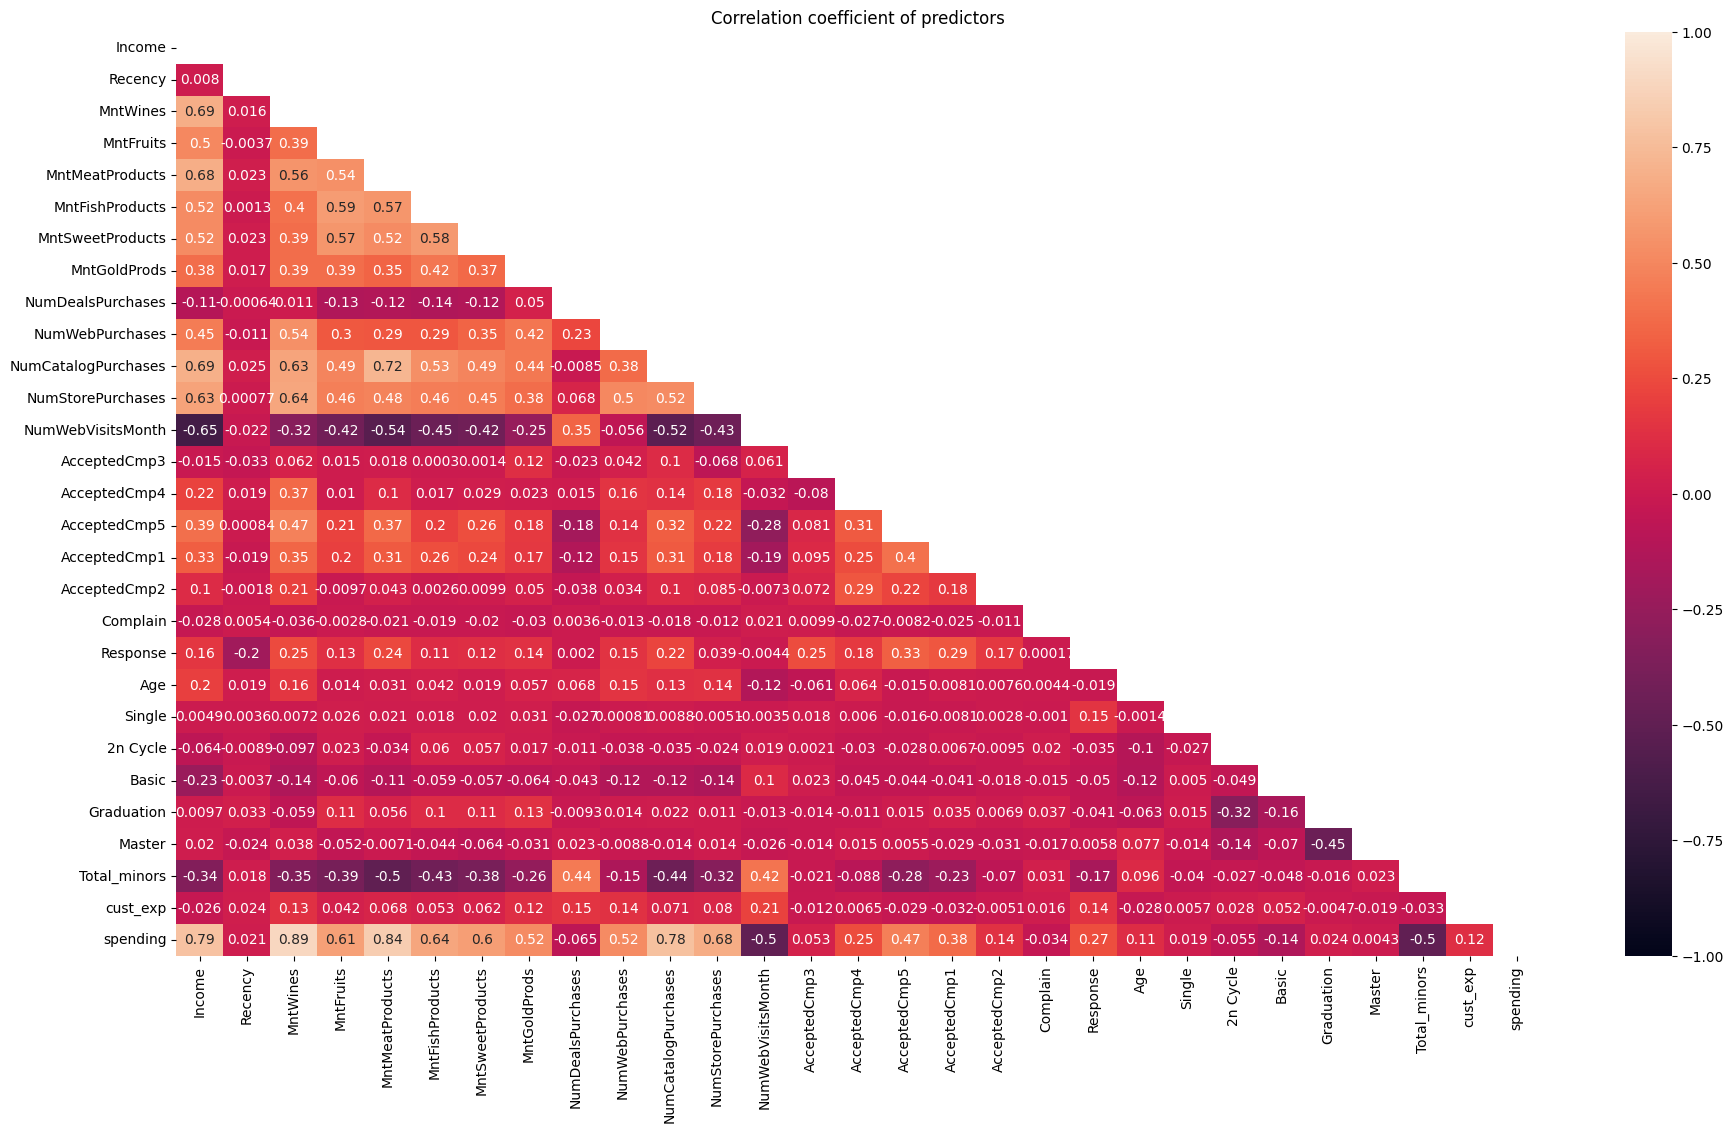

In [125]:
plt.figure(figsize=(22,12))

mask=np.triu(np.ones_like(data.corr(),dtype=bool))

sns.heatmap(data.corr(),annot=True,mask=mask, vmin=-1, vmax=1)
plt.title('Correlation coefficient of predictors')
plt.show()

From heatmap, we can identify strong relationships between:
NumCatalogPurchases and MntMeatProducts ;
NumCatalogPurchases and Income ;
NumCatalogPurchases and MntWines ;
NumStorePurchases and Income 


In [126]:
def compute_vif(considered_features):
    
    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

computing the vif values of variables that are highly correlated with other variables

In [127]:
considered_features = ['MntMeatProducts', 'NumCatalogPurchases', 'NumWebVisitsMonth','Income','MntWines','NumStorePurchases','MntFruits','MntFishProducts']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

C:\Users\prava\AppData\Local\Temp\ipykernel_35020\3358208561.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
3,Income,3.585382
1,NumCatalogPurchases,2.755992
0,MntMeatProducts,2.693800
4,MntWines,2.636316
5,NumStorePurchases,2.064075
2,NumWebVisitsMonth,1.983273
7,MntFishProducts,1.884966
6,MntFruits,1.790558


Now that the variation inflation factors are all within the acceptable range, The derived model will be more likely to yield statistically significant results.

In [128]:
data.corr()['Response'].sort_values(ascending=False)

Response               1.000000
AcceptedCmp5           0.328148
AcceptedCmp1           0.293849
spending               0.265615
AcceptedCmp3           0.254106
MntWines               0.247280
MntMeatProducts        0.236548
NumCatalogPurchases    0.220813
AcceptedCmp4           0.176847
AcceptedCmp2           0.169234
Income                 0.160893
Single                 0.150484
NumWebPurchases        0.148390
cust_exp               0.141575
MntGoldProds           0.140595
MntFruits              0.125854
MntSweetProducts       0.117263
MntFishProducts        0.111325
NumStorePurchases      0.038702
Master                 0.005847
NumDealsPurchases      0.002017
Complain               0.000167
NumWebVisitsMonth     -0.004397
Age                   -0.018557
2n Cycle              -0.035198
Graduation            -0.040639
Basic                 -0.049578
Total_minors          -0.169451
Recency               -0.198781
Name: Response, dtype: float64

# SCALING

In [129]:
 from sklearn import preprocessing

columns = ['Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
          'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Total_minors','cust_exp']

min_max = preprocessing.MinMaxScaler()
data[columns] = min_max.fit_transform(data[columns])
data.head()

C:\Users\prava\AppData\Local\Temp\ipykernel_35020\3641278836.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Single,2n Cycle,Basic,Graduation,Master,Total_minors,cust_exp,spending
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,...,1,0.696429,1,0,0,1,0,0.000000,0.892661,1617
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,...,0,0.750000,1,0,0,1,0,0.666667,0.061468,27
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,...,0,0.553571,0,0,0,1,0,0.000000,0.545872,776
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,...,0,0.214286,0,0,0,1,0,0.333333,0.035780,53
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,...,0,0.267857,0,0,0,0,0,0.333333,0.016514,422


In [130]:
data=data.drop(["AcceptedCmp4","AcceptedCmp3","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2"],axis=1)

In [131]:
data['Response'].value_counts()

0    1902
1     334
Name: Response, dtype: int64

In [132]:
import plotly.express as px
X = data.drop('Response',axis=1)
Y = data['Response']
fig = px.pie(values=Y.value_counts(), 
             width=800, height=400, 
             title="Imbalanced Data",
             color_discrete_sequence=["skyblue","black"])


fig.show()

# CLASSIFICATION MODELS

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [134]:
X_train.shape

(1677, 23)

# LOGISTIC REGRESSION

In [135]:
import statsmodels.api as sm
def log_reg_model(X_train,y_train,X_test,y_test):
    log_reg = sm.Logit(y_train, X_train).fit()
    return log_reg

In [136]:
LG=log_reg_model(X_train,y_train,X_test,y_test)
print(LG.summary())

Optimization terminated successfully.
         Current function value: 0.312852
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1677
Model:                          Logit   Df Residuals:                     1654
Method:                           MLE   Df Model:                           22
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2477
Time:                        02:05:15   Log-Likelihood:                -524.65
converged:                       True   LL-Null:                       -697.42
Covariance Type:            nonrobust   LLR p-value:                 6.435e-60
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income                 -1.4915      1.023     -1.457      0.145      -3.497       0.514
R

There are few columns which have insignificant statistical power values. so we droped those columns from training and testing data.

In [137]:
X_train=X_train.drop(["MntFruits","MntFishProducts","MntSweetProducts","NumDealsPurchases","NumWebPurchases","Complain","NumCatalogPurchases"],axis=1)

In [138]:
X_train=X_train.drop(["Income","MntGoldProds"],axis=1)

In [139]:
X_train=X_train.drop(["NumWebVisitsMonth"],axis=1)

In [140]:
LG2=log_reg_model(X_train,y_train,X_test,y_test)
print(LG2.summary())

Optimization terminated successfully.
         Current function value: 0.317211
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1677
Model:                          Logit   Df Residuals:                     1664
Method:                           MLE   Df Model:                           12
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2372
Time:                        02:05:15   Log-Likelihood:                -531.96
converged:                       True   LL-Null:                       -697.42
Covariance Type:            nonrobust   LLR p-value:                 1.481e-63
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Recency              -3.0848      0.295    -10.448      0.000      -3.663      -2.506
MntWines

In [141]:
X_test=X_test.drop(["MntFruits","MntFishProducts","MntSweetProducts","NumDealsPurchases","NumWebPurchases","Complain","NumCatalogPurchases"],axis=1)

In [142]:
X_test=X_test.drop(["Income","MntGoldProds","NumWebVisitsMonth"],axis=1)

In [143]:
LG_y_pred = LG2.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,roc_curve,roc_auc_score

def conf_matrix(y_test,y_pred):
    print("Accuracy Score for LDA :",accuracy_score(y_test, y_pred))
    matrix_test=confusion_matrix(y_test,y_pred)
    cm_test=pd.DataFrame(matrix_test,index=['Rejected','Accepted'],columns=['Rejected','Accepted'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_test,fmt="d", annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Label')
    plt.xlabel('Predicted Label')
    plt.show()

Accuracy Score for LDA : 0.8407871198568873


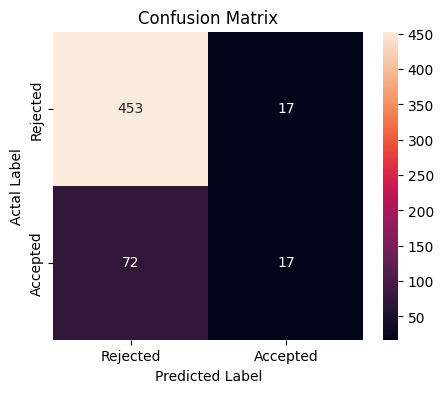

In [145]:
#confusion matrix for logistic regression
conf_matrix(y_test,list(round(LG_y_pred)))

# LINEAR DISCRIMINANT ANALYSIS

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def linear_dis_alys(X_train,y_train):
    model = LDA()
    LDA_mod=model.fit(X_train,y_train)
    return LDA_mod

In [147]:
LDA=linear_dis_alys(X_train,y_train)

In [148]:
LDA_y_pred = LDA.predict(X_test)

Accuracy Score for LDA : 0.8407871198568873


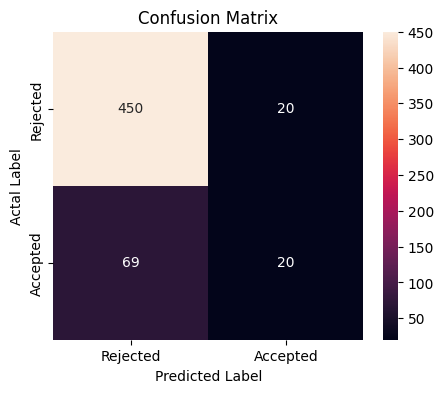

In [149]:
#confusion matrix for LDA
conf_matrix(y_test,LDA_y_pred)

# QUADRACTIC DISCRIMINANT ANALYSIS

In [150]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
def quad_dis_alys(X_train,y_train):
    model = QDA()
    QDA_mod=model.fit(X_train,y_train)
    return QDA_mod

In [151]:
QDA=quad_dis_alys(X_train,y_train)

In [152]:
QDA_y_pred = QDA.predict(X_test)

Accuracy Score for LDA : 0.8193202146690519


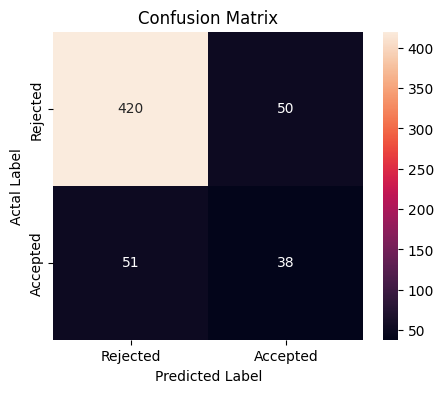

In [153]:
#confusion matrix for QDA
conf_matrix(y_test,QDA_y_pred)

# MODEL EVALUATION(ROC & AUC)

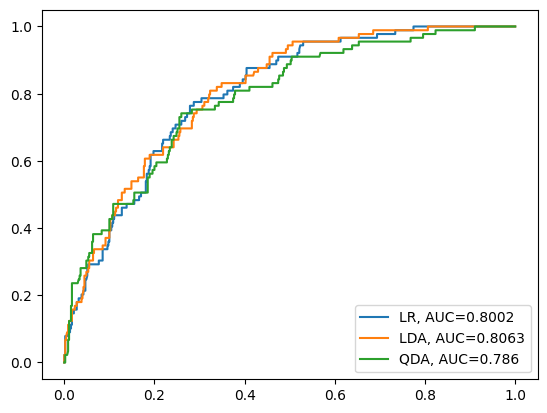

In [154]:
FPR, TPR, threshold = roc_curve(y_test,LG_y_pred)
#plt.plot(false_positive_rate, true_positive_rate)
auc = round(roc_auc_score(y_test, LG_y_pred), 4)
plt.plot(FPR,TPR,label="LR, AUC="+str(auc))

y_LDA =LDA.predict_proba(X_test)[:,1]
FPR1, TPR1, threshold = roc_curve(y_test, y_LDA)
#plt.plot(false_positive_rate, true_positive_rate)
auc = round(roc_auc_score(y_test, y_LDA), 4)
plt.plot(FPR1,TPR1,label="LDA, AUC="+str(auc))

y_QDA =QDA.predict_proba(X_test)[:,1]
FPR2, TPR2, threshold = roc_curve(y_test, y_QDA)
#plt.plot(false_positive_rate, true_positive_rate)
auc = round(roc_auc_score(y_test, y_QDA), 4)
plt.plot(FPR2,TPR2,label="QDA, AUC="+str(auc))


plt.legend()

From the ROC curve and AUC we can see that LDA have high AUC which indicates its the best model we have.